In [1]:
!pip install pmdarima


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytest-astropy 0.8.0 requires pytest-cov>=2.0, which is not installed.
pytest-astropy 0.8.0 requires pytest-filter-subpackage>=0.1, which is not installed.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.6 which is incompatible.
torchvision 0.9.0 requires torch==1.8.0, but you have torch 1.3.1 which is incompatible.
tensorflow 2.4.1 requires numpy~=1.19.2, but you have numpy 1.21.6 which is incompatible.
pytest-astropy 0.8.0 requires pytest-doctestplus>=0.2.0, but you have pytest-doctestplus 0.0.0 which is incompatible.


  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.1
    Uninstalling patsy-0.5.1:
      Successfully uninstalled patsy-0.5.1
  Attempting uninstall: packaging
    Found existing installation: packaging 20.4
    Uninstalling packaging-20.4:
      Successfully uninstalled packaging-20.4
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [116]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math




In [19]:
import os
current_directory = os.getcwd()
print(current_directory) 
os.chdir("C:/Users/sarge/cs7643/project")

C:\Users\sarge\cs6400-2022-03-Team055\project_dev\fakedatagen


In [20]:
price=pd.read_csv('assets_m6.csv')
print(price.head(10))


  symbol       date    price
0   ABBV  1/31/2022  133.124
1    ACN  1/31/2022  349.726
2    AEP  1/31/2022   87.403
3    AIZ  1/31/2022  149.851
4   ALLE  1/31/2022  121.261
5   AMAT  1/31/2022  136.910
6    AMP  1/31/2022  299.218
7   AMZN  1/31/2022  149.574
8    AVB  1/31/2022  238.714
9    AVY  1/31/2022  202.905


In [123]:
price_amzn=price.loc[price['symbol']=='AMZN']
print(price_amzn.head(10))
print(price_amzn.dtypes)

    symbol       date    price
7     AMZN  1/31/2022  149.574
107   AMZN   2/1/2022  151.194
207   AMZN   2/2/2022  150.612
307   AMZN   2/3/2022  138.846
407   AMZN   2/4/2022  157.640
507   AMZN   2/7/2022  157.936
607   AMZN   2/8/2022  161.414
707   AMZN   2/9/2022  161.190
807   AMZN  2/10/2022  159.004
907   AMZN  2/11/2022  153.294
symbol     object
date       object
price     float64
dtype: object


In [55]:
price_amzn=price_amzn.set_index('date')
price_amzn=price_amzn.drop(['symbol'], axis=1)
print(price_amzn.head(100))

             price
date              
1/31/2022  149.574
2/1/2022   151.194
2/2/2022   150.612
2/3/2022   138.846
2/4/2022   157.640
...            ...
6/16/2022  103.660
6/17/2022  106.220
6/21/2022  108.680
6/22/2022  108.950
6/23/2022  112.440

[100 rows x 1 columns]


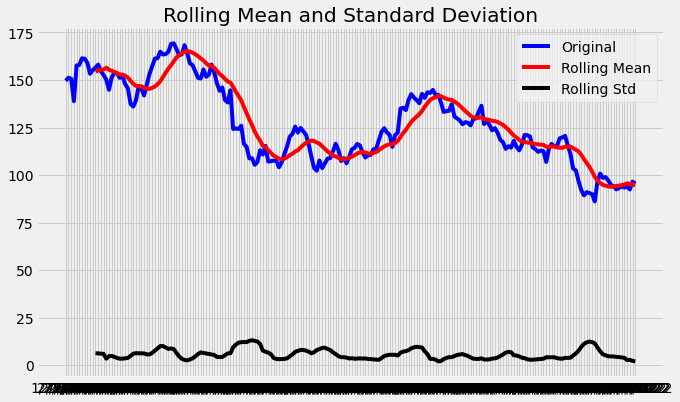

Results of dickey fuller test
Test Statistics                 -1.238317
p-value                          0.656899
No. of lags used                 0.000000
Number of observations used    211.000000
critical value (1%)             -3.461727
critical value (5%)             -2.875337
critical value (10%)            -2.574124
dtype: float64


In [31]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(price_amzn)

<Figure size 720x432 with 0 Axes>

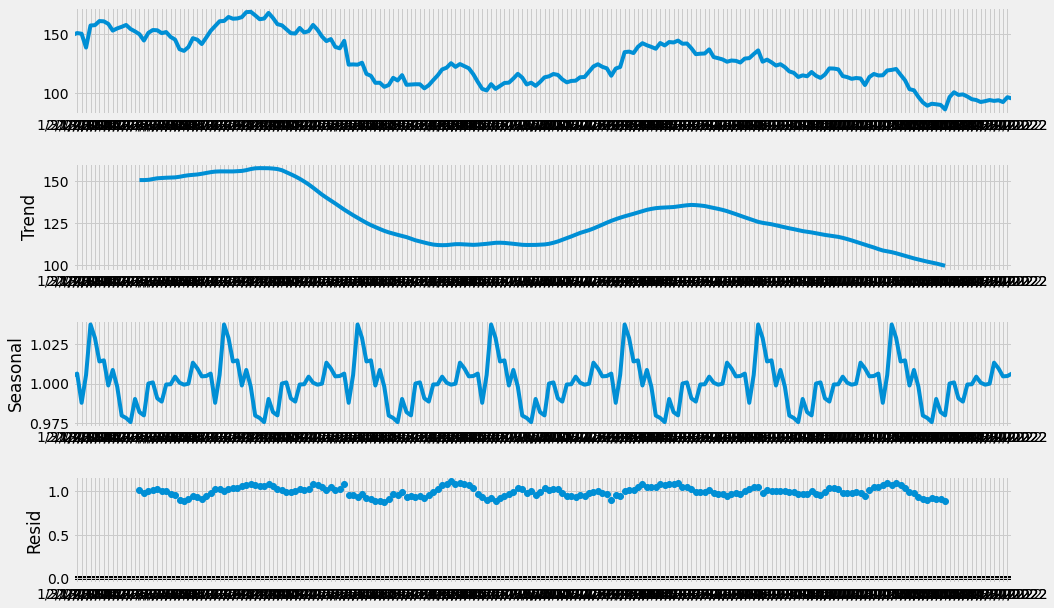

In [107]:

result = seasonal_decompose(price_amzn, model='multiplicative', period=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)
  

No handles with labels found to put in legend.


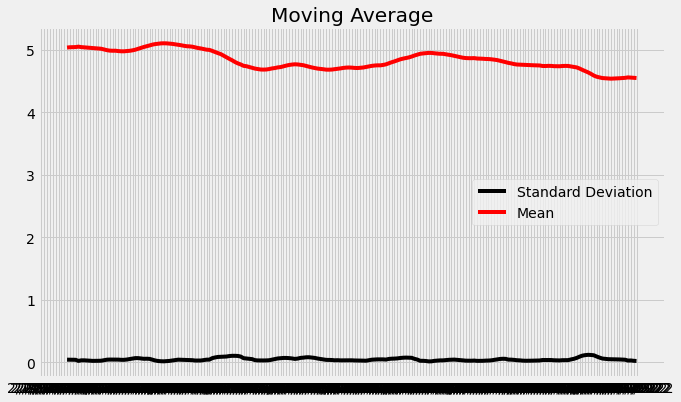

In [108]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(price_amzn)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

test_data_length 37


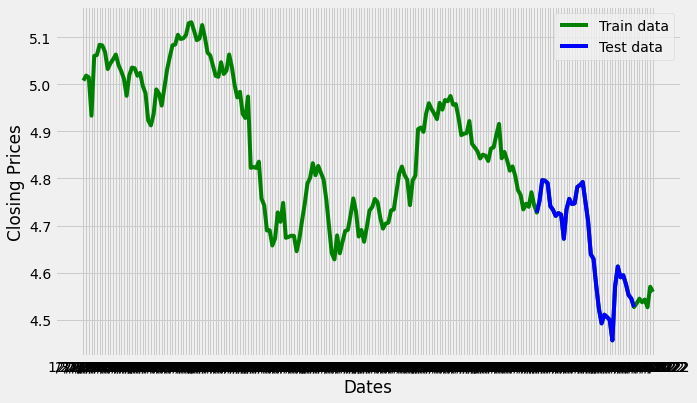

In [112]:
train_data=df_log.loc[:'9/30/2022']
test_data = df_log.loc['9/30/2022':'11/21/2022']
print("test_data_length",len(test_data))
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-669.127, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-667.496, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-667.443, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-670.688, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-666.334, Time=0.17 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.475 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  169
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 336.344
Date:                Sun, 04 Dec 2022   AIC                           -670.688
Time:                        22:37:09   BIC                           -667.564
Sample:                             0   HQIC                          -669.420
                                - 169                                       

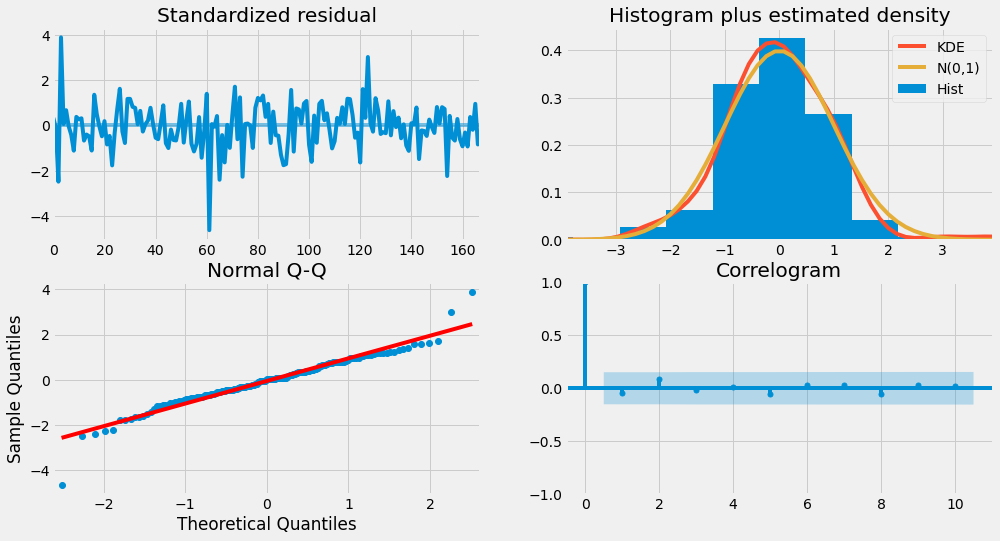

In [113]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [114]:
model = ARIMA(train_data, order=(0,1,0))  
fitted = model.fit()  
print(fitted.summary())
   

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  169
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 336.344
Date:                Sun, 04 Dec 2022   AIC                           -670.688
Time:                        22:37:22   BIC                           -667.564
Sample:                             0   HQIC                          -669.420
                                - 169                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0011    7.2e-05     14.821      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):                73.22
Prob(Q):                              0.54   Pr

               price
date                
9/30/2022   4.727388
10/3/2022   4.727388
10/4/2022   4.727388
10/5/2022   4.727388
10/6/2022   4.727388
10/7/2022   4.727388
10/10/2022  4.727388
10/11/2022  4.727388
10/12/2022  4.727388
10/13/2022  4.727388
10/14/2022  4.727388
10/17/2022  4.727388
10/18/2022  4.727388
10/19/2022  4.727388
10/20/2022  4.727388
10/21/2022  4.727388
10/24/2022  4.727388
10/25/2022  4.727388
10/26/2022  4.727388
10/27/2022  4.727388
10/28/2022  4.727388
10/31/2022  4.727388
11/1/2022   4.727388
11/2/2022   4.727388
11/3/2022   4.727388
11/4/2022   4.727388
11/7/2022   4.727388
11/8/2022   4.727388
11/9/2022   4.727388
11/10/2022  4.727388
11/11/2022  4.727388
11/14/2022  4.727388
11/15/2022  4.727388
11/16/2022  4.727388
11/17/2022  4.727388
11/18/2022  4.727388
11/21/2022  4.727388
               price
date                
2022-09-30  4.727388
2022-10-03  4.727388
2022-10-04  4.727388
2022-10-05  4.727388
2022-10-06  4.727388
2022-10-07  4.727388
2022-10-10  4

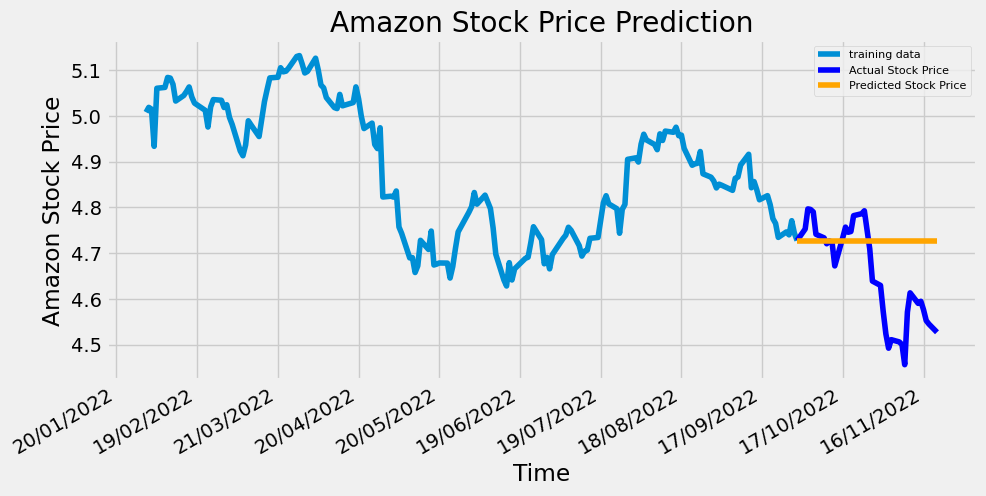

In [125]:
fc = fitted.forecast(len(test_data), alpha=0.05)  # 95% conf
#print(fc)
#print(test_data)
fc_series = test_data.copy(deep=True)
fc_series['price']=fc.values
print(fc_series)
fc_series.index = pd.to_datetime(fc_series.index)
train_data.index=pd.to_datetime(train_data.index)
test_data.index=pd.to_datetime(test_data.index)
print(fc_series)

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
#plt.fill_between( lower_series, upper_series, color='k', alpha=.10)
plt.title('Amazon Stock Price Prediction')

plt.xlabel('Time')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d/%m/%Y"))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.gcf().autofmt_xdate()
plt.ylabel('Amazon Stock Price')
plt.legend(loc='upper right', fontsize=8)

plt.show()
plt.close()





In [106]:
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.016445887623551796
MAE: 0.09932557441496177
RMSE: 0.1282415206692115
MAPE: 169     NaN
170     NaN
171     NaN
172     NaN
173     NaN
174     NaN
175     NaN
176     NaN
177     NaN
178     NaN
179     NaN
180     NaN
181     NaN
182     NaN
183     NaN
184     NaN
185     NaN
186     NaN
187     NaN
188     NaN
189     NaN
190     NaN
191     NaN
192     NaN
193     NaN
194     NaN
195     NaN
196     NaN
197     NaN
198     NaN
199     NaN
200     NaN
201     NaN
202     NaN
203     NaN
204     NaN
price   NaN
dtype: float64
